In [2]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [4]:
cleveland = pd.read_csv('heart.csv')

In [5]:
print('format(cleveland.shape)')
print(cleveland.loc[1])

format(cleveland.shape)
age          53.0
sex           1.0
cp            0.0
trestbps    140.0
chol        203.0
fbs           1.0
restecg       0.0
thalach     155.0
exang         1.0
oldpeak       3.1
slope         0.0
ca            0.0
thal          3.0
target        0.0
Name: 1, dtype: float64


In [6]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
281,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
282,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
284,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
print (data.shape)
print (data.dtypes)


(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [10]:
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


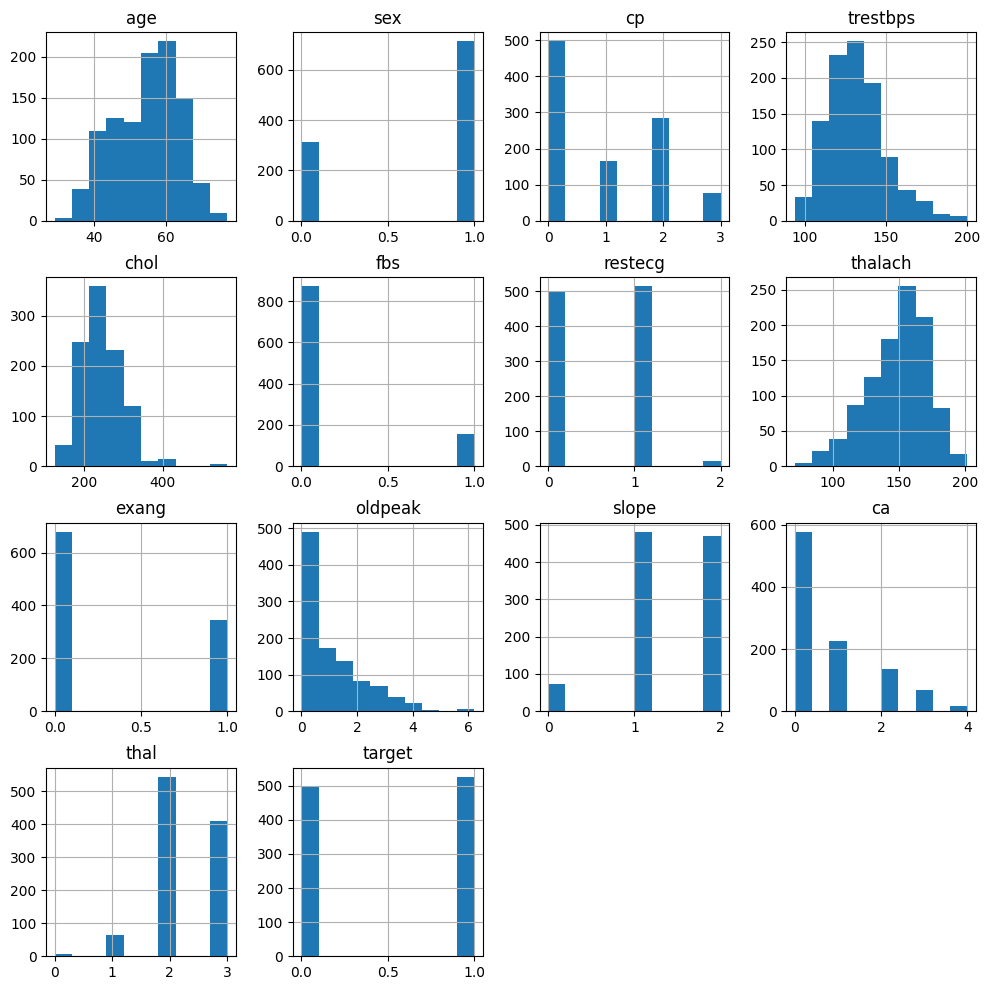

In [12]:
data.hist(figsize = (12, 12))
plt.show()

In [37]:
# create X and Y datasets for training
from sklearn import model_selection

X = np.array(data.drop(['target'],axis=1))
y = np.array(data['target'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [39]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=695d67e5b652458ccc863538b6ce4dda51045956fa508bf90a2f2a417ef8bf31
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [42]:
# convert the data to categorical labels
from keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(820, 2)
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 112       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, activation='softmax'))

    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 112       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 5)                 25        
                                                                 
Total params: 173 (692.00 Byte)
Trainable params: 173 (692.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [43]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

[0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 1]


In [21]:
# define a new keras model for binary classification
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 112       
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 153 (612.00 Byte)
Trainable params: 153 (612.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
# fit the binary model on the training data
binary_model.fit(X_train, Y_train_binary, epochs=100, batch_size=10, verbose = 1)

Epoch 1/100
82/82 [==============================] - 1s 3ms/step - loss: 0.6876 - accuracy: 0.5366
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5841
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6756
Epoch 4/100
82/82 [==============================] - 0s 2ms/step - loss: 0.6089 - accuracy: 0.6915
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7244
Epoch 6/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5423 - accuracy: 0.7134
Epoch 7/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5395 - accuracy: 0.7366
Epoch 8/100
82/82 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7451
Epoch 9/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7524
Epoch 10/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4660 - accuracy: 0.7610
Epoch 11/

In [45]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

7/7 [==============================] - 0s 2ms/step
Results for Categorical Model
0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      99.0
           1       0.00      0.00      0.00     106.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00     205.0
   macro avg       0.00      0.00      0.00     205.0
weighted avg       0.00      0.00      0.00     205.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [46]:
# generate classification report using predictions for binary model
binary_pred = np.round(binary_model.predict(X_test)).astype(int)

print('Results for Binary Model')
print(accuracy_score(Y_test_binary, binary_pred))
print(classification_report(Y_test_binary, binary_pred))

7/7 [==============================] - 0s 5ms/step
Results for Binary Model
0.8390243902439024
              precision    recall  f1-score   support

           0       0.95      0.71      0.81        99
           1       0.78      0.96      0.86       106

    accuracy                           0.84       205
   macro avg       0.86      0.83      0.84       205
weighted avg       0.86      0.84      0.84       205

